# 차원 축소 : LDA & LLE

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### LDA (Linear Discriminant Analysis)

- 타겟 클래스 간 분리를 최대로 하는 축으로 결정

In [2]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

iris_ds = load_iris()

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ds.data)
iris_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
iris_lda = lda .fit_transform(iris_scaled, iris_ds.target)

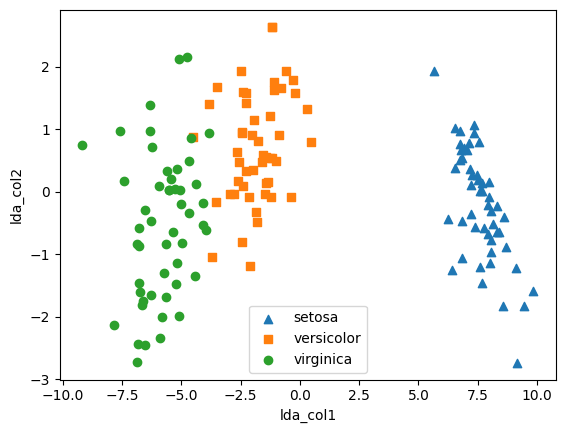

In [5]:
# 차원 축소한 데이터로 시각화
iris_lda_df = pd.DataFrame(iris_lda, columns=['lda_col1', 'lda_col2'])
iris_lda_df['target'] = iris_ds.target

markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    X = iris_lda_df[iris_lda_df['target'] == i]['lda_col1']
    y = iris_lda_df[iris_lda_df['target'] == i]['lda_col2']
    plt.scatter(X, y, marker=marker, label=iris_ds.target_names[i])

plt.legend()
plt.xlabel('lda_col1')
plt.ylabel('lda_col2')
plt.show()

### LLE (Locally Linear Embedding)

- 데이터포인트를 근접한 이웃과 선형 결합으로 표현하고 이를 유지하도록 저차원 공간에 매핑

In [8]:
from sklearn.manifold import LocallyLinearEmbedding

# 각각의 파라미터는 기본값
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)

iris_lle = lle.fit_transform(iris_ds.data)

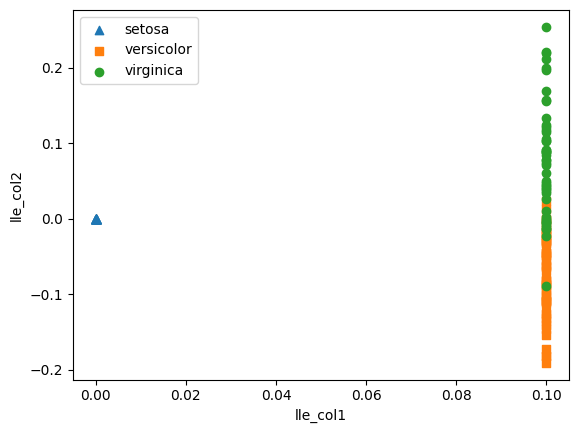

In [9]:
# 차원 축소한 데이터로 시각화
iris_lle_df = pd.DataFrame(iris_lle, columns=['lle_col1', 'lle_col2'])
iris_lle_df['target'] = iris_ds.target

markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    X = iris_lle_df[iris_lle_df['target'] == i]['lle_col1']
    y = iris_lle_df[iris_lle_df['target'] == i]['lle_col2']
    plt.scatter(X, y, marker=marker, label=iris_ds.target_names[i])

plt.legend()
plt.xlabel('lle_col1')
plt.ylabel('lle_col2')
plt.show()

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

lr_clf = LogisticRegression(max_iter=1000)
result = cross_validate(lr_clf, iris_lle_df[['lle_col1', 'lle_col2']], iris_lle_df['target'], cv=5)

np.mean(result['test_score'])

np.float64(0.9066666666666668)